# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Na'imatul Lu'lu'a
- **Email:** naimalulua@gmail.com
- **ID Dicoding:** naimatul_lulua

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana hubungan antara freight value dengan harga produk?
- Pertanyaan 2: Bagaimana jumlah transaksi berdasarkan rating?
- Pertanyaan 3: Bagaimana jumlah pesanan berdasarkan kota?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_name_translation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Beberapa tabel terhubung oleh variabel kunci
- Beberapa data terlihat memiliki missing value

### Assessing Data

#### Menilai tabel `customer_df`

In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [17]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_items_df`

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [23]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [26]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_name_translation_df`

In [30]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [32]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [33]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [35]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [36]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [38]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `customer_df`

##### Duplicate data

In [39]:
customer_df.duplicated().sum()

0

#### Membersihkan tabel `geolocation_df`

##### Duplicate data

In [40]:
geolocation_df.duplicated().sum()

261831

In [41]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [42]:
geolocation_df.drop_duplicates(inplace=True)

In [43]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan tabel `order_items_df`

##### Duplicate data

In [44]:
order_items_df.duplicated().sum()

0

##### Memperbaiki tipe data

In [45]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [46]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `order_payments_df`

##### Duplicate data

In [47]:
order_payments_df.duplicated().sum()

0

####  Membersihkan tabel `order_reviews_df`

##### Duplicate data

In [48]:
order_reviews_df.duplicated().sum()

0

##### Missing value

In [49]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [50]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [51]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [52]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.lower()
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.replace('Recomendo', 'recomendo')

In [53]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
recomendo,825
super recomendo,578
bom,406
muito bom,333
excelente,304
...,...
compraria novamente,1
irritante,1
gerou duvida,1


In [54]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('recomendo')

In [55]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,recomendo,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,recomendo,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,recomendo,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,recomendo,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,recomendo,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,recomendo,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,recomendo,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,recomendo,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,recomendo,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [56]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [57]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.lower()
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.replace('Muito bom', 'muito bom')

In [58]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.lower()
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.replace('Bom', 'bom')

In [59]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.lower()
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.replace('Recomendo', 'recomendo')

In [60]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
muito bom,369
bom,309
otimo,207
recomendo,175
ok,139
...,...
"bem antes da data máxima, ótimo ! agora é ver se o aparelho funciona.",1
ótima loja entrega antes do prazo,1
recebi no tempo certo.obrigado.,1


In [61]:
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('muito bom')

#### Membersihkan tabel `orders_df`

##### Duplicate data

In [62]:
orders_df.duplicated().sum()

0

##### Memperbaiki tipe data

In [63]:
datetime_columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [64]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing value

In [65]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [66]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [67]:
# Mengisi dengan rata-rata
rata_rata_tanggal = orders_df['order_approved_at'].mean()
orders_df['order_approved_at']=orders_df['order_approved_at'].fillna(rata_rata_tanggal)

In [68]:
orders_df.order_approved_at.value_counts()

,count
order_approved_at,
2017-12-31 18:35:24.098800128,160
2018-02-27 04:31:10.000000000,9
2018-02-06 05:31:52.000000000,7
2017-11-07 07:30:38.000000000,7
2017-12-05 10:30:42.000000000,7
...,...
2018-08-22 11:50:14.000000000,1
2017-09-22 11:27:36.000000000,1
2018-03-07 16:40:32.000000000,1


In [69]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [70]:
# Mengisi dengan rata-rata
rata_rata_tanggal2 = orders_df['order_delivered_carrier_date'].mean()
orders_df['order_delivered_carrier_date']=orders_df['order_delivered_carrier_date'].fillna(rata_rata_tanggal2)

In [71]:
orders_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-01-04 21:49:48.138278656,1783
2018-05-09 15:48:00.000000000,47
2018-05-10 18:29:00.000000000,32
2018-05-07 12:31:00.000000000,21
2018-07-24 16:07:00.000000000,16
...,...
2018-01-03 17:37:21.000000000,1
2017-10-27 20:07:58.000000000,1
2017-11-21 18:57:37.000000000,1


In [72]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [73]:
# Mengisi dengan rata-rata
rata_rata_tanggal3 = orders_df['order_delivered_customer_date'].mean()
orders_df['order_delivered_customer_date']=orders_df['order_delivered_customer_date'].fillna(rata_rata_tanggal3)

In [74]:
orders_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-01-14 12:09:19.035542272,2965
2018-07-24 21:36:42.000000000,3
2018-05-08 23:38:46.000000000,3
2018-05-14 20:02:44.000000000,3
2017-12-02 00:26:45.000000000,3
...,...
2018-07-12 17:48:45.000000000,1
2018-05-18 18:24:36.000000000,1
2018-01-17 13:29:13.000000000,1


#### Membersihkan tabel `product_category_name_translation_df`

##### Duplicate data

In [75]:
product_category_name_translation_df.duplicated().sum()

0

#### Membersihkan tabel `products_df`

##### Duplicate data

In [76]:
products_df.duplicated().sum()

0

##### Missing value

In [77]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [78]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [79]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [80]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('cama_mesa_banho')

In [81]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [82]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [83]:
products_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [84]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(60.0)

In [85]:
products_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2792
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [86]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [87]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [88]:
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(404.0)

In [89]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,704
729.0,86
703.0,66
651.0,66
184.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [90]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [91]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [92]:
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(1.0)

In [93]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,17099
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [94]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [95]:
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(200.0)

In [96]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [97]:
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(16.0)

In [98]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [99]:
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(11.0)
#

In [100]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [101]:
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(10.0)

In [102]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### Membersihkan tabel `seller_df`

##### Duplicate data

In [103]:
sellers_df.duplicated().sum()

0

### Menggabungkan Data

#### Menggabungkan tabel `customer_df` dengan `orders_df`

In [104]:
merged_df1 = pd.merge(customer_df, orders_df, on="customer_id")

In [105]:
merged_df1.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27
order_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90734
order_delivered_carrier_date,81019


In [106]:
merged_df1.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


#### Menggabungkan tabel `merged_df1` dengan `order_reviews_df`

In [107]:
merged_df2 = pd.merge(merged_df1, order_reviews_df, on="order_id")

In [108]:
merged_df2.nunique()

,0
customer_id,98673
customer_unique_id,95380
customer_zip_code_prefix,14973
customer_city,4117
customer_state,27
order_id,98673
order_status,8
order_purchase_timestamp,98115
order_approved_at,90083
order_delivered_carrier_date,80452


In [109]:
merged_df2.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


#### Menggabungkan tabel `merged_df2` dengan `order_items_df` dan `seller_df`

In [110]:
merged_df3 = pd.merge(merged_df2, order_items_df, on="order_id")
transaction_merged_df = pd.merge(merged_df3, sellers_df, on="seller_id")

In [111]:
transaction_merged_df.nunique()

,0
customer_id,97917
customer_unique_id,94721
customer_zip_code_prefix,14955
customer_city,4108
customer_state,27
order_id,97917
order_status,7
order_purchase_timestamp,97371
order_approved_at,89535
order_delivered_carrier_date,80451


In [112]:
transaction_merged_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0


In [113]:
transaction_merged_df.to_csv('transaction_merged.csv', index=False)

In [116]:
from google.colab import files
files.download('transaction_merged.csv')

!cp transaction_merged.csv /content/drive/MyDrive/Colab Notebooks/Proyek Analisis Data/data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cp: target 'Data/data' is not a directory


## Exploratory Data Analysis (EDA)

### Explore `transaction_merged_df`

In [117]:
transaction_merged_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix
count,112372.000000,112372,112372,112372,112372,112372,112372.000000,112372.000000,112372,112372.000000,112372.000000,112372.000000
mean,35131.880691,2017-12-31 19:01:10.836658944,2018-01-01 06:37:41.051689984,2018-01-04 21:01:59.860977152,2018-01-14 07:09:05.545828864,2018-01-24 15:07:20.180827648,4.032473,1.196010,2018-01-07 10:36:26.190634496,120.378962,19.977752,24451.942575
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1001.000000
25%,11250.000000,2017-09-13 14:52:03.249999872,2017-09-13 23:05:39.500000,2017-09-19 18:07:44,2017-09-29 20:10:44.500000,2017-10-04 00:00:00,4.000000,1.000000,2017-09-20 14:30:20,39.900000,13.070000,6429.000000
50%,24320.000000,2018-01-19 18:02:47,2018-01-20 09:10:13.500000,2018-01-23 00:22:12,2018-01-30 00:43:58,2018-02-15 00:00:00,5.000000,1.000000,2018-01-26 13:53:53,74.900000,16.250000,13568.000000
75%,59063.000000,2018-05-04 15:19:58.750000128,2018-05-04 23:10:10.249999872,2018-05-07 15:01:00,2018-05-14 17:17:00,2018-05-25 00:00:00,5.000000,1.000000,2018-05-10 13:10:06.249999872,134.900000,21.150000,27930.000000
max,99990.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,5.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000
std,29894.587573,NaN,NaN,NaN,NaN,NaN,1.387849,0.691243,NaN,182.152386,15.781421,27607.504965


In [118]:
transaction_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112372 non-null  object        
 1   customer_unique_id             112372 non-null  object        
 2   customer_zip_code_prefix       112372 non-null  int64         
 3   customer_city                  112372 non-null  object        
 4   customer_state                 112372 non-null  object        
 5   order_id                       112372 non-null  object        
 6   order_status                   112372 non-null  object        
 7   order_purchase_timestamp       112372 non-null  datetime64[ns]
 8   order_approved_at              112372 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112372 non-null  datetime64[ns]
 10  order_delivered_customer_date  112372 non-null  datetime64[ns]
 11  

In [121]:
transaction_merged_df['review_score'].value_counts()

,count
review_score,
5,63525
4,21315
1,14235
3,9423
2,3874


In [123]:
transaction_merged_df.groupby(by=["seller_city", "order_status"]).agg({
    "order_item_id": "count",
    "price": "sum"
})

order_item_id     price
seller_city     order_status                         
04482255        processing                1    399.90
abadia de goias delivered                 1    142.47
afonso claudio  delivered                 6    293.99
aguas claras df delivered                 1     35.00
alambari        delivered                 5    138.60
...                                     ...       ...
votuporanga     delivered               133  20083.68
                shipped                   3    675.89
xanxere         delivered                 7   1947.15
                shipped                   1    349.90
xaxim           delivered                 2    360.00

[1090 rows x 2 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara freight value dengan harga produk?

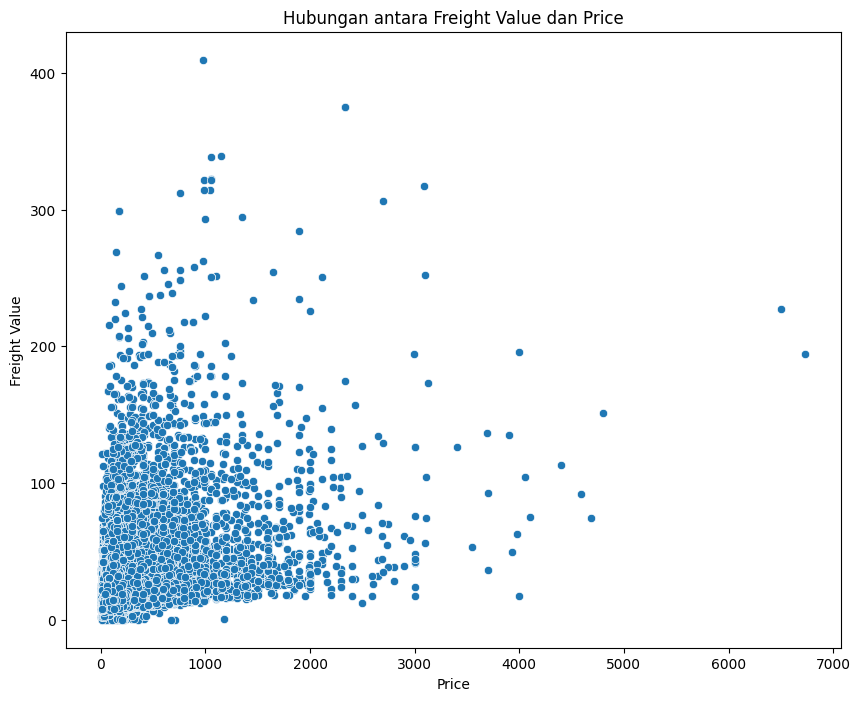

In [136]:
plt.figure(figsize=(10, 8))
sn.scatterplot(x='price', y='freight_value', data=transaction_merged_df)
plt.title('Hubungan antara Freight Value dan Price')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()

### Pertanyaan 2: Bagaimana jumlah transaksi berdasarkan rating?

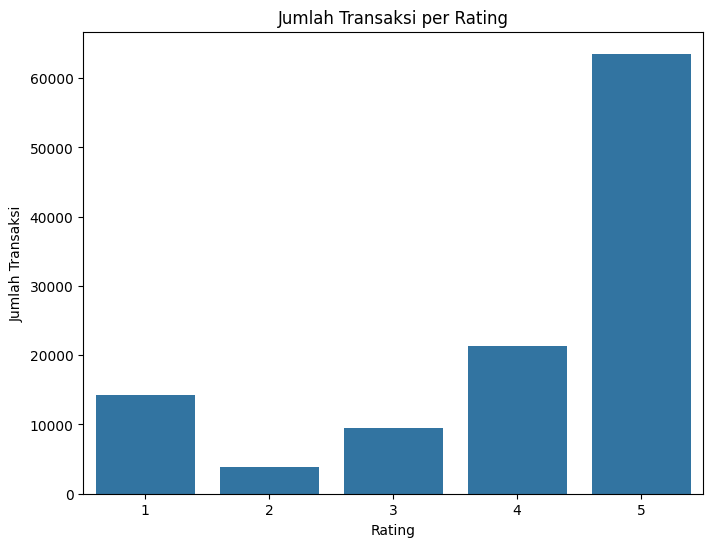

In [135]:
# Hitung jumlah transaksi per rating
transactions_per_rating = transaction_merged_df.groupby('review_score')['order_id'].count()

# Visualisasikan dengan bar chart
plt.figure(figsize=(8, 6))
sn.barplot(x=transactions_per_rating.index, y=transactions_per_rating.values)
plt.title('Jumlah Transaksi per Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Pertanyaan 3: Bagaimana jumlah pesanan berdasarkan kota?

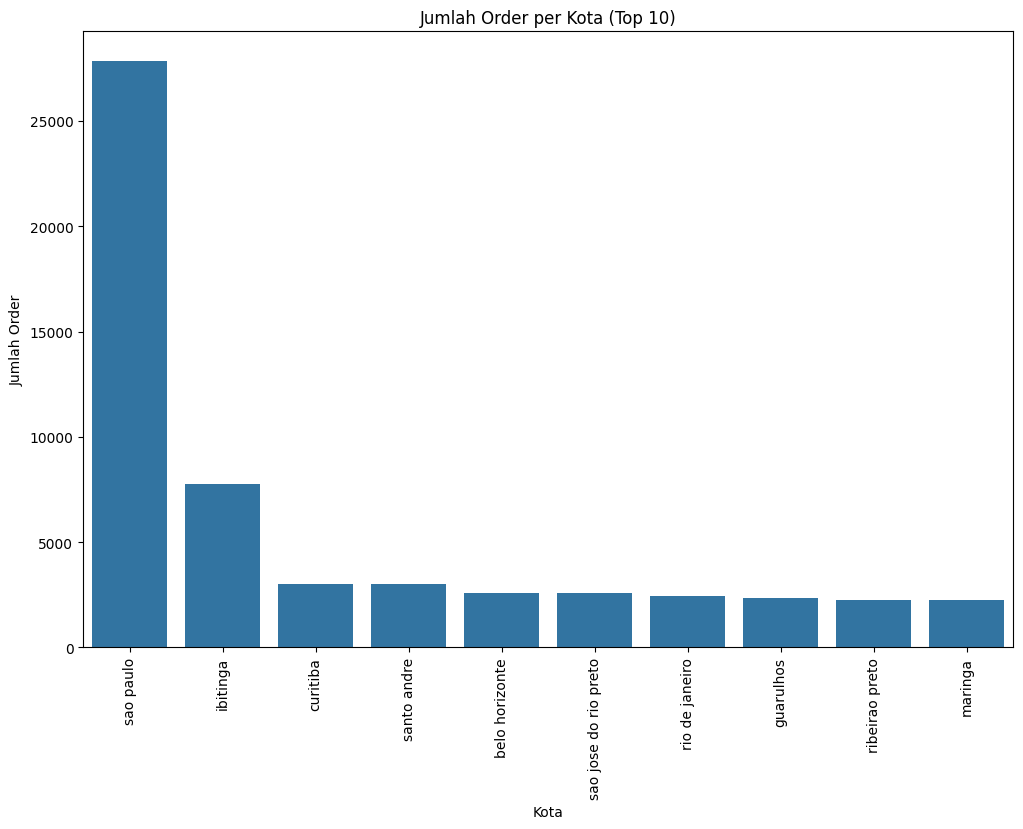

In [128]:
order_per_kota = transaction_merged_df.groupby('seller_city')['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sn.barplot(x=order_per_kota.index, y=order_per_kota.values)
plt.title('Jumlah Order per Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan scatter plot menunjukkan bahwa freight value memiliki hubungan meskipun lemah dan tidak linier.
- Conclution pertanyaan 2 : Kebanyakan pelanggan puas (rating 5 dan 4 menguasai ~73% dari total transaksi), tetapi ada juga sejumlah besar pelanggan yang tidak puas (rating 1 mencapai 12% dari total). Hal ini menunjukkan bahwa meskipun banyak pelanggan yang mendapatkan pengalaman positif, masalah-masalah serius yang dialami oleh kelompok yang tidak puas harus segera diidentifikasi dan ditangani.
- Conclution Pertanyaan 3 : São Paulo mendominasi jumlah pesanan secara signifikan dibandingkan kota-kota lain, dengan lebih dari 25.000 transaksi. Ini menunjukkan bahwa São Paulo adalah pusat utama bagi penjual di e-commerce tersebut. Hal ini bisa disebabkan oleh beberapa faktor, seperti: Populasi yang besar dan lebih banyak penjual berbasis di kota ini, São Paulo mungkin memiliki akses logistik yang lebih baik, infrastruktur yang mendukung pengiriman yang cepat dan efisien, serta Ekonomi yang lebih maju, yang mendorong lebih banyak bisnis e-commerce dan jumlah penjual yang lebih tinggi dibandingkan kota lain